In [1]:
!hadoop fs -put SW_EpisodeIV.txt /hw1

In [2]:
!hadoop fs -put SW_EpisodeV.txt /hw1

In [3]:
!hadoop fs -put SW_EpisodeVI.txt /hw1

In [4]:
!hadoop fs -ls /hw1

Found 4 items
-rw-r--r--   3 root supergroup      78278 2023-11-28 03:28 /hw1/SW_EpisodeIV.txt
-rw-r--r--   3 root supergroup      55487 2023-11-28 03:28 /hw1/SW_EpisodeV.txt
-rw-r--r--   3 root supergroup      48176 2023-11-28 03:28 /hw1/SW_EpisodeVI.txt
-rw-r--r--   3 root supergroup         75 2023-11-28 03:27 /hw1/text.txt


In [5]:
! pip install mrjob

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 439.6/439.6 KB 2.0 MB/s eta 0:00:00a 0:00:01


In [6]:
!hadoop fs -mkdir /hw1/results

In [7]:
!hadoop fs -mkdir /hw1/results/task1

In [8]:
%%file task1.py
# %%file is an Ipython magic function that saves the code cell as a file

from mrjob.job import MRJob
from mrjob.step import MRStep

class MRTask1(MRJob):


    def mapper(self, _, line):
        # yield each word in the line
        name = line.split('" "')[1]
        yield (name.strip(), 1)

    def combiner(self, name, counts):
        # optimization: sum the words we've seen so far
        yield (name, sum(counts))

    def reducer_count_replicas(self, name, counts):
        # send all (num_occurrences, word) pairs to the same reducer.
        # num_occurrences is so we can easily use Python's max() function.
        yield None, (sum(counts), name)

    def reducer_sort_num_replicas(self, _, num_replicas_pairs):
        # each item of word_count_pairs is (count, word),
        # so yielding one results in key=counts, value=word
        sorted_pairs = sorted(num_replicas_pairs, key=lambda x: x[0], reverse=True)[:20]
        yield None, sorted_pairs
    
    def steps(self):
        return [
            MRStep(mapper=self.mapper,
                   combiner=self.combiner,
                   reducer=self.reducer_count_replicas),
            MRStep(reducer=self.reducer_sort_num_replicas)
        ]

if __name__ == '__main__':
    MRTask1.run()

Overwriting task1.py


In [9]:
!python3 task1.py SW_EpisodeIV.txt

No configs found; falling back on auto-configuration
No configs specified for inline runner
Creating temp directory /tmp/task1.root.20231128.002848.053877
Running step 1 of 2...
Running step 2 of 2...
job output is in /tmp/task1.root.20231128.002848.053877/output
Streaming final output from /tmp/task1.root.20231128.002848.053877/output...
null	[[254, "LUKE"], [153, "HAN"], [119, "THREEPIO"], [82, "BEN"], [57, "LEIA"], [41, "VADER"], [37, "RED LEADER"], [34, "BIGGS"], [28, "TARKIN"], [25, "OWEN"], [19, "TROOPER"], [14, "WEDGE"], [14, "GOLD LEADER"], [11, "OFFICER"], [8, "RED TEN"], [7, "GOLD FIVE"], [6, "DEATH STAR INTERCOM VOICE"], [6, "GREEDO"], [6, "AUNT BERU"], [6, "JABBA"]]
Removing temp directory /tmp/task1.root.20231128.002848.053877...


In [10]:
!python3 task1.py -r hadoop hdfs://namenode:8020/hw1/SW_EpisodeIV.txt --output /hw1/results/task1/1

No configs found; falling back on auto-configuration
No configs specified for hadoop runner
Looking for hadoop binary in /opt/hadoop/bin...
Found hadoop binary: /opt/hadoop/bin/hadoop
Using Hadoop version 3.3.6
Looking for Hadoop streaming jar in /opt/hadoop...
Found Hadoop streaming jar: /opt/hadoop/share/hadoop/tools/lib/hadoop-streaming-3.3.6.jar
Creating temp directory /tmp/task1.root.20231128.002853.845911
uploading working dir files to hdfs:///user/root/tmp/mrjob/task1.root.20231128.002853.845911/files/wd...
Copying other local files to hdfs:///user/root/tmp/mrjob/task1.root.20231128.002853.845911/files/
Running step 1 of 2...
  packageJobJar: [/tmp/hadoop-unjar8505884096513568852/] [] /tmp/streamjob3279107732334467294.jar tmpDir=null
  Connecting to ResourceManager at resourcemanager/172.20.0.4:8032
  Connecting to ResourceManager at resourcemanager/172.20.0.4:8032
  Disabling Erasure Coding for path: /tmp/hadoop-yarn/staging/root/.staging/job_1701129529886_0001
  Total input fi

In [20]:
!pip install matplotlib

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 11.6/11.6 MB 9.8 MB/s eta 0:00:00:00:0100:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.6/3.6 MB 10.2 MB/s eta 0:00:0000:0100:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 310.7/310.7 KB 9.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.6/4.6 MB 10.1 MB/s eta 0:00:0000:0100:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 10.0 MB/s eta 0:00:00a 0:00:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 103.1/103.1 KB 7.4 MB/s eta 0:00:00


In [11]:
!pip install pyarrow

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 38.0/38.0 MB 9.1 MB/s eta 0:00:0000:0100:01m
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 18.2/18.2 MB 9.6 MB/s eta 0:00:0000:0100:01


In [12]:
!hadoop classpath --glob

/opt/hadoop/etc/hadoop:/opt/hadoop/share/hadoop/common/lib/jackson-core-asl-1.9.13.jar:/opt/hadoop/share/hadoop/common/lib/jakarta.activation-api-1.2.1.jar:/opt/hadoop/share/hadoop/common/lib/netty-resolver-4.1.89.Final.jar:/opt/hadoop/share/hadoop/common/lib/commons-net-3.9.0.jar:/opt/hadoop/share/hadoop/common/lib/netty-handler-4.1.89.Final.jar:/opt/hadoop/share/hadoop/common/lib/netty-transport-sctp-4.1.89.Final.jar:/opt/hadoop/share/hadoop/common/lib/netty-transport-native-unix-common-4.1.89.Final.jar:/opt/hadoop/share/hadoop/common/lib/commons-text-1.10.0.jar:/opt/hadoop/share/hadoop/common/lib/kerb-core-1.0.1.jar:/opt/hadoop/share/hadoop/common/lib/netty-transport-native-kqueue-4.1.89.Final-osx-aarch_64.jar:/opt/hadoop/share/hadoop/common/lib/netty-buffer-4.1.89.Final.jar:/opt/hadoop/share/hadoop/common/lib/hadoop-annotations-3.3.6.jar:/opt/hadoop/share/hadoop/common/lib/jsr305-3.0.2.jar:/opt/hadoop/share/hadoop/common/lib/netty-resolver-dns-native-macos-4.1.89.Final-osx-aarch_64

In [13]:
import os
os.environ['CLASSPATH'] = '/opt/hadoop/etc/hadoop:/opt/hadoop/share/hadoop/common/lib/jackson-core-asl-1.9.13.jar:/opt/hadoop/share/hadoop/common/lib/jakarta.activation-api-1.2.1.jar:/opt/hadoop/share/hadoop/common/lib/netty-resolver-4.1.89.Final.jar:/opt/hadoop/share/hadoop/common/lib/commons-net-3.9.0.jar:/opt/hadoop/share/hadoop/common/lib/netty-handler-4.1.89.Final.jar:/opt/hadoop/share/hadoop/common/lib/netty-transport-sctp-4.1.89.Final.jar:/opt/hadoop/share/hadoop/common/lib/netty-transport-native-unix-common-4.1.89.Final.jar:/opt/hadoop/share/hadoop/common/lib/commons-text-1.10.0.jar:/opt/hadoop/share/hadoop/common/lib/kerb-core-1.0.1.jar:/opt/hadoop/share/hadoop/common/lib/netty-transport-native-kqueue-4.1.89.Final-osx-aarch_64.jar:/opt/hadoop/share/hadoop/common/lib/netty-buffer-4.1.89.Final.jar:/opt/hadoop/share/hadoop/common/lib/hadoop-annotations-3.3.6.jar:/opt/hadoop/share/hadoop/common/lib/jsr305-3.0.2.jar:/opt/hadoop/share/hadoop/common/lib/netty-resolver-dns-native-macos-4.1.89.Final-osx-aarch_64.jar:/opt/hadoop/share/hadoop/common/lib/re2j-1.1.jar:/opt/hadoop/share/hadoop/common/lib/jackson-mapper-asl-1.9.13.jar:/opt/hadoop/share/hadoop/common/lib/commons-cli-1.2.jar:/opt/hadoop/share/hadoop/common/lib/javax.servlet-api-3.1.0.jar:/opt/hadoop/share/hadoop/common/lib/metrics-core-3.2.4.jar:/opt/hadoop/share/hadoop/common/lib/commons-beanutils-1.9.4.jar:/opt/hadoop/share/hadoop/common/lib/curator-client-5.2.0.jar:/opt/hadoop/share/hadoop/common/lib/jackson-core-2.12.7.jar:/opt/hadoop/share/hadoop/common/lib/kerby-pkix-1.0.1.jar:/opt/hadoop/share/hadoop/common/lib/jaxb-impl-2.2.3-1.jar:/opt/hadoop/share/hadoop/common/lib/commons-logging-1.1.3.jar:/opt/hadoop/share/hadoop/common/lib/jettison-1.5.4.jar:/opt/hadoop/share/hadoop/common/lib/jcip-annotations-1.0-1.jar:/opt/hadoop/share/hadoop/common/lib/httpcore-4.4.13.jar:/opt/hadoop/share/hadoop/common/lib/hadoop-auth-3.3.6.jar:/opt/hadoop/share/hadoop/common/lib/paranamer-2.3.jar:/opt/hadoop/share/hadoop/common/lib/jetty-webapp-9.4.51.v20230217.jar:/opt/hadoop/share/hadoop/common/lib/listenablefuture-9999.0-empty-to-avoid-conflict-with-guava.jar:/opt/hadoop/share/hadoop/common/lib/kerb-identity-1.0.1.jar:/opt/hadoop/share/hadoop/common/lib/protobuf-java-2.5.0.jar:/opt/hadoop/share/hadoop/common/lib/netty-resolver-dns-native-macos-4.1.89.Final-osx-x86_64.jar:/opt/hadoop/share/hadoop/common/lib/zookeeper-jute-3.6.3.jar:/opt/hadoop/share/hadoop/common/lib/netty-transport-native-epoll-4.1.89.Final-linux-aarch_64.jar:/opt/hadoop/share/hadoop/common/lib/commons-collections-3.2.2.jar:/opt/hadoop/share/hadoop/common/lib/jetty-io-9.4.51.v20230217.jar:/opt/hadoop/share/hadoop/common/lib/avro-1.7.7.jar:/opt/hadoop/share/hadoop/common/lib/nimbus-jose-jwt-9.8.1.jar:/opt/hadoop/share/hadoop/common/lib/commons-io-2.8.0.jar:/opt/hadoop/share/hadoop/common/lib/jetty-server-9.4.51.v20230217.jar:/opt/hadoop/share/hadoop/common/lib/netty-transport-rxtx-4.1.89.Final.jar:/opt/hadoop/share/hadoop/common/lib/jackson-annotations-2.12.7.jar:/opt/hadoop/share/hadoop/common/lib/hadoop-shaded-protobuf_3_7-1.1.1.jar:/opt/hadoop/share/hadoop/common/lib/commons-math3-3.1.1.jar:/opt/hadoop/share/hadoop/common/lib/netty-codec-stomp-4.1.89.Final.jar:/opt/hadoop/share/hadoop/common/lib/stax2-api-4.2.1.jar:/opt/hadoop/share/hadoop/common/lib/jaxb-api-2.2.11.jar:/opt/hadoop/share/hadoop/common/lib/slf4j-api-1.7.36.jar:/opt/hadoop/share/hadoop/common/lib/netty-codec-4.1.89.Final.jar:/opt/hadoop/share/hadoop/common/lib/netty-codec-mqtt-4.1.89.Final.jar:/opt/hadoop/share/hadoop/common/lib/jsp-api-2.1.jar:/opt/hadoop/share/hadoop/common/lib/dnsjava-2.1.7.jar:/opt/hadoop/share/hadoop/common/lib/kerby-asn1-1.0.1.jar:/opt/hadoop/share/hadoop/common/lib/netty-codec-haproxy-4.1.89.Final.jar:/opt/hadoop/share/hadoop/common/lib/netty-codec-http-4.1.89.Final.jar:/opt/hadoop/share/hadoop/common/lib/commons-daemon-1.0.13.jar:/opt/hadoop/share/hadoop/common/lib/netty-transport-native-epoll-4.1.89.Final-linux-x86_64.jar:/opt/hadoop/share/hadoop/common/lib/netty-codec-socks-4.1.89.Final.jar:/opt/hadoop/share/hadoop/common/lib/kerb-common-1.0.1.jar:/opt/hadoop/share/hadoop/common/lib/curator-framework-5.2.0.jar:/opt/hadoop/share/hadoop/common/lib/kerb-client-1.0.1.jar:/opt/hadoop/share/hadoop/common/lib/jul-to-slf4j-1.7.36.jar:/opt/hadoop/share/hadoop/common/lib/jsr311-api-1.1.1.jar:/opt/hadoop/share/hadoop/common/lib/curator-recipes-5.2.0.jar:/opt/hadoop/share/hadoop/common/lib/kerb-server-1.0.1.jar:/opt/hadoop/share/hadoop/common/lib/j2objc-annotations-1.1.jar:/opt/hadoop/share/hadoop/common/lib/netty-resolver-dns-classes-macos-4.1.89.Final.jar:/opt/hadoop/share/hadoop/common/lib/kerby-util-1.0.1.jar:/opt/hadoop/share/hadoop/common/lib/netty-codec-xml-4.1.89.Final.jar:/opt/hadoop/share/hadoop/common/lib/httpclient-4.5.13.jar:/opt/hadoop/share/hadoop/common/lib/kerby-config-1.0.1.jar:/opt/hadoop/share/hadoop/common/lib/netty-handler-ssl-ocsp-4.1.89.Final.jar:/opt/hadoop/share/hadoop/common/lib/netty-transport-classes-kqueue-4.1.89.Final.jar:/opt/hadoop/share/hadoop/common/lib/jackson-databind-2.12.7.1.jar:/opt/hadoop/share/hadoop/common/lib/audience-annotations-0.5.0.jar:/opt/hadoop/share/hadoop/common/lib/kerb-admin-1.0.1.jar:/opt/hadoop/share/hadoop/common/lib/jersey-core-1.19.4.jar:/opt/hadoop/share/hadoop/common/lib/commons-configuration2-2.8.0.jar:/opt/hadoop/share/hadoop/common/lib/jsch-0.1.55.jar:/opt/hadoop/share/hadoop/common/lib/netty-transport-udt-4.1.89.Final.jar:/opt/hadoop/share/hadoop/common/lib/netty-transport-native-kqueue-4.1.89.Final-osx-x86_64.jar:/opt/hadoop/share/hadoop/common/lib/kerb-crypto-1.0.1.jar:/opt/hadoop/share/hadoop/common/lib/netty-handler-proxy-4.1.89.Final.jar:/opt/hadoop/share/hadoop/common/lib/kerb-util-1.0.1.jar:/opt/hadoop/share/hadoop/common/lib/guava-27.0-jre.jar:/opt/hadoop/share/hadoop/common/lib/failureaccess-1.0.jar:/opt/hadoop/share/hadoop/common/lib/netty-transport-classes-epoll-4.1.89.Final.jar:/opt/hadoop/share/hadoop/common/lib/netty-codec-smtp-4.1.89.Final.jar:/opt/hadoop/share/hadoop/common/lib/woodstox-core-5.4.0.jar:/opt/hadoop/share/hadoop/common/lib/jetty-servlet-9.4.51.v20230217.jar:/opt/hadoop/share/hadoop/common/lib/snappy-java-1.1.8.2.jar:/opt/hadoop/share/hadoop/common/lib/netty-codec-redis-4.1.89.Final.jar:/opt/hadoop/share/hadoop/common/lib/kerby-xdr-1.0.1.jar:/opt/hadoop/share/hadoop/common/lib/hadoop-shaded-guava-1.1.1.jar:/opt/hadoop/share/hadoop/common/lib/commons-lang3-3.12.0.jar:/opt/hadoop/share/hadoop/common/lib/netty-all-4.1.89.Final.jar:/opt/hadoop/share/hadoop/common/lib/commons-codec-1.15.jar:/opt/hadoop/share/hadoop/common/lib/netty-transport-4.1.89.Final.jar:/opt/hadoop/share/hadoop/common/lib/checker-qual-2.5.2.jar:/opt/hadoop/share/hadoop/common/lib/jetty-util-ajax-9.4.51.v20230217.jar:/opt/hadoop/share/hadoop/common/lib/token-provider-1.0.1.jar:/opt/hadoop/share/hadoop/common/lib/zookeeper-3.6.3.jar:/opt/hadoop/share/hadoop/common/lib/jersey-servlet-1.19.4.jar:/opt/hadoop/share/hadoop/common/lib/gson-2.9.0.jar:/opt/hadoop/share/hadoop/common/lib/jetty-xml-9.4.51.v20230217.jar:/opt/hadoop/share/hadoop/common/lib/reload4j-1.2.22.jar:/opt/hadoop/share/hadoop/common/lib/jersey-server-1.19.4.jar:/opt/hadoop/share/hadoop/common/lib/kerb-simplekdc-1.0.1.jar:/opt/hadoop/share/hadoop/common/lib/netty-resolver-dns-4.1.89.Final.jar:/opt/hadoop/share/hadoop/common/lib/netty-codec-dns-4.1.89.Final.jar:/opt/hadoop/share/hadoop/common/lib/netty-common-4.1.89.Final.jar:/opt/hadoop/share/hadoop/common/lib/slf4j-reload4j-1.7.36.jar:/opt/hadoop/share/hadoop/common/lib/commons-compress-1.21.jar:/opt/hadoop/share/hadoop/common/lib/jetty-security-9.4.51.v20230217.jar:/opt/hadoop/share/hadoop/common/lib/jetty-http-9.4.51.v20230217.jar:/opt/hadoop/share/hadoop/common/lib/animal-sniffer-annotations-1.17.jar:/opt/hadoop/share/hadoop/common/lib/jersey-json-1.20.jar:/opt/hadoop/share/hadoop/common/lib/netty-codec-http2-4.1.89.Final.jar:/opt/hadoop/share/hadoop/common/lib/jetty-util-9.4.51.v20230217.jar:/opt/hadoop/share/hadoop/common/lib/netty-codec-memcache-4.1.89.Final.jar:/opt/hadoop/share/hadoop/common/hadoop-nfs-3.3.6.jar:/opt/hadoop/share/hadoop/common/hadoop-kms-3.3.6.jar:/opt/hadoop/share/hadoop/common/hadoop-common-3.3.6-tests.jar:/opt/hadoop/share/hadoop/common/hadoop-common-3.3.6.jar:/opt/hadoop/share/hadoop/common/hadoop-registry-3.3.6.jar:/opt/hadoop/share/hadoop/hdfs:/opt/hadoop/share/hadoop/hdfs/lib/jackson-core-asl-1.9.13.jar:/opt/hadoop/share/hadoop/hdfs/lib/jakarta.activation-api-1.2.1.jar:/opt/hadoop/share/hadoop/hdfs/lib/netty-resolver-4.1.89.Final.jar:/opt/hadoop/share/hadoop/hdfs/lib/commons-net-3.9.0.jar:/opt/hadoop/share/hadoop/hdfs/lib/netty-handler-4.1.89.Final.jar:/opt/hadoop/share/hadoop/hdfs/lib/netty-transport-sctp-4.1.89.Final.jar:/opt/hadoop/share/hadoop/hdfs/lib/netty-transport-native-unix-common-4.1.89.Final.jar:/opt/hadoop/share/hadoop/hdfs/lib/commons-text-1.10.0.jar:/opt/hadoop/share/hadoop/hdfs/lib/kerb-core-1.0.1.jar:/opt/hadoop/share/hadoop/hdfs/lib/netty-transport-native-kqueue-4.1.89.Final-osx-aarch_64.jar:/opt/hadoop/share/hadoop/hdfs/lib/netty-buffer-4.1.89.Final.jar:/opt/hadoop/share/hadoop/hdfs/lib/hadoop-annotations-3.3.6.jar:/opt/hadoop/share/hadoop/hdfs/lib/jsr305-3.0.2.jar:/opt/hadoop/share/hadoop/hdfs/lib/netty-resolver-dns-native-macos-4.1.89.Final-osx-aarch_64.jar:/opt/hadoop/share/hadoop/hdfs/lib/re2j-1.1.jar:/opt/hadoop/share/hadoop/hdfs/lib/jackson-mapper-asl-1.9.13.jar:/opt/hadoop/share/hadoop/hdfs/lib/commons-cli-1.2.jar:/opt/hadoop/share/hadoop/hdfs/lib/kotlin-stdlib-common-1.4.10.jar:/opt/hadoop/share/hadoop/hdfs/lib/javax.servlet-api-3.1.0.jar:/opt/hadoop/share/hadoop/hdfs/lib/metrics-core-3.2.4.jar:/opt/hadoop/share/hadoop/hdfs/lib/commons-beanutils-1.9.4.jar:/opt/hadoop/share/hadoop/hdfs/lib/curator-client-5.2.0.jar:/opt/hadoop/share/hadoop/hdfs/lib/jackson-core-2.12.7.jar:/opt/hadoop/share/hadoop/hdfs/lib/kerby-pkix-1.0.1.jar:/opt/hadoop/share/hadoop/hdfs/lib/jaxb-impl-2.2.3-1.jar:/opt/hadoop/share/hadoop/hdfs/lib/commons-logging-1.1.3.jar:/opt/hadoop/share/hadoop/hdfs/lib/jettison-1.5.4.jar:/opt/hadoop/share/hadoop/hdfs/lib/jcip-annotations-1.0-1.jar:/opt/hadoop/share/hadoop/hdfs/lib/httpcore-4.4.13.jar:/opt/hadoop/share/hadoop/hdfs/lib/hadoop-auth-3.3.6.jar:/opt/hadoop/share/hadoop/hdfs/lib/paranamer-2.3.jar:/opt/hadoop/share/hadoop/hdfs/lib/kotlin-stdlib-1.4.10.jar:/opt/hadoop/share/hadoop/hdfs/lib/jetty-webapp-9.4.51.v20230217.jar:/opt/hadoop/share/hadoop/hdfs/lib/listenablefuture-9999.0-empty-to-avoid-conflict-with-guava.jar:/opt/hadoop/share/hadoop/hdfs/lib/kerb-identity-1.0.1.jar:/opt/hadoop/share/hadoop/hdfs/lib/protobuf-java-2.5.0.jar:/opt/hadoop/share/hadoop/hdfs/lib/netty-resolver-dns-native-macos-4.1.89.Final-osx-x86_64.jar:/opt/hadoop/share/hadoop/hdfs/lib/zookeeper-jute-3.6.3.jar:/opt/hadoop/share/hadoop/hdfs/lib/leveldbjni-all-1.8.jar:/opt/hadoop/share/hadoop/hdfs/lib/netty-transport-native-epoll-4.1.89.Final-linux-aarch_64.jar:/opt/hadoop/share/hadoop/hdfs/lib/commons-collections-3.2.2.jar:/opt/hadoop/share/hadoop/hdfs/lib/HikariCP-java7-2.4.12.jar:/opt/hadoop/share/hadoop/hdfs/lib/jetty-io-9.4.51.v20230217.jar:/opt/hadoop/share/hadoop/hdfs/lib/avro-1.7.7.jar:/opt/hadoop/share/hadoop/hdfs/lib/nimbus-jose-jwt-9.8.1.jar:/opt/hadoop/share/hadoop/hdfs/lib/commons-io-2.8.0.jar:/opt/hadoop/share/hadoop/hdfs/lib/jetty-server-9.4.51.v20230217.jar:/opt/hadoop/share/hadoop/hdfs/lib/netty-transport-rxtx-4.1.89.Final.jar:/opt/hadoop/share/hadoop/hdfs/lib/jackson-annotations-2.12.7.jar:/opt/hadoop/share/hadoop/hdfs/lib/hadoop-shaded-protobuf_3_7-1.1.1.jar:/opt/hadoop/share/hadoop/hdfs/lib/commons-math3-3.1.1.jar:/opt/hadoop/share/hadoop/hdfs/lib/netty-codec-stomp-4.1.89.Final.jar:/opt/hadoop/share/hadoop/hdfs/lib/stax2-api-4.2.1.jar:/opt/hadoop/share/hadoop/hdfs/lib/jaxb-api-2.2.11.jar:/opt/hadoop/share/hadoop/hdfs/lib/netty-codec-4.1.89.Final.jar:/opt/hadoop/share/hadoop/hdfs/lib/netty-codec-mqtt-4.1.89.Final.jar:/opt/hadoop/share/hadoop/hdfs/lib/dnsjava-2.1.7.jar:/opt/hadoop/share/hadoop/hdfs/lib/kerby-asn1-1.0.1.jar:/opt/hadoop/share/hadoop/hdfs/lib/netty-codec-haproxy-4.1.89.Final.jar:/opt/hadoop/share/hadoop/hdfs/lib/netty-codec-http-4.1.89.Final.jar:/opt/hadoop/share/hadoop/hdfs/lib/commons-daemon-1.0.13.jar:/opt/hadoop/share/hadoop/hdfs/lib/netty-transport-native-epoll-4.1.89.Final-linux-x86_64.jar:/opt/hadoop/share/hadoop/hdfs/lib/netty-codec-socks-4.1.89.Final.jar:/opt/hadoop/share/hadoop/hdfs/lib/json-simple-1.1.1.jar:/opt/hadoop/share/hadoop/hdfs/lib/kerb-common-1.0.1.jar:/opt/hadoop/share/hadoop/hdfs/lib/curator-framework-5.2.0.jar:/opt/hadoop/share/hadoop/hdfs/lib/kerb-client-1.0.1.jar:/opt/hadoop/share/hadoop/hdfs/lib/okhttp-4.9.3.jar:/opt/hadoop/share/hadoop/hdfs/lib/jsr311-api-1.1.1.jar:/opt/hadoop/share/hadoop/hdfs/lib/netty-3.10.6.Final.jar:/opt/hadoop/share/hadoop/hdfs/lib/curator-recipes-5.2.0.jar:/opt/hadoop/share/hadoop/hdfs/lib/kerb-server-1.0.1.jar:/opt/hadoop/share/hadoop/hdfs/lib/j2objc-annotations-1.1.jar:/opt/hadoop/share/hadoop/hdfs/lib/netty-resolver-dns-classes-macos-4.1.89.Final.jar:/opt/hadoop/share/hadoop/hdfs/lib/kerby-util-1.0.1.jar:/opt/hadoop/share/hadoop/hdfs/lib/netty-codec-xml-4.1.89.Final.jar:/opt/hadoop/share/hadoop/hdfs/lib/httpclient-4.5.13.jar:/opt/hadoop/share/hadoop/hdfs/lib/kerby-config-1.0.1.jar:/opt/hadoop/share/hadoop/hdfs/lib/netty-handler-ssl-ocsp-4.1.89.Final.jar:/opt/hadoop/share/hadoop/hdfs/lib/netty-transport-classes-kqueue-4.1.89.Final.jar:/opt/hadoop/share/hadoop/hdfs/lib/jackson-databind-2.12.7.1.jar:/opt/hadoop/share/hadoop/hdfs/lib/audience-annotations-0.5.0.jar:/opt/hadoop/share/hadoop/hdfs/lib/kerb-admin-1.0.1.jar:/opt/hadoop/share/hadoop/hdfs/lib/jersey-core-1.19.4.jar:/opt/hadoop/share/hadoop/hdfs/lib/commons-configuration2-2.8.0.jar:/opt/hadoop/share/hadoop/hdfs/lib/jsch-0.1.55.jar:/opt/hadoop/share/hadoop/hdfs/lib/netty-transport-udt-4.1.89.Final.jar:/opt/hadoop/share/hadoop/hdfs/lib/netty-transport-native-kqueue-4.1.89.Final-osx-x86_64.jar:/opt/hadoop/share/hadoop/hdfs/lib/kerb-crypto-1.0.1.jar:/opt/hadoop/share/hadoop/hdfs/lib/netty-handler-proxy-4.1.89.Final.jar:/opt/hadoop/share/hadoop/hdfs/lib/kerb-util-1.0.1.jar:/opt/hadoop/share/hadoop/hdfs/lib/guava-27.0-jre.jar:/opt/hadoop/share/hadoop/hdfs/lib/failureaccess-1.0.jar:/opt/hadoop/share/hadoop/hdfs/lib/netty-transport-classes-epoll-4.1.89.Final.jar:/opt/hadoop/share/hadoop/hdfs/lib/netty-codec-smtp-4.1.89.Final.jar:/opt/hadoop/share/hadoop/hdfs/lib/woodstox-core-5.4.0.jar:/opt/hadoop/share/hadoop/hdfs/lib/jetty-servlet-9.4.51.v20230217.jar:/opt/hadoop/share/hadoop/hdfs/lib/snappy-java-1.1.8.2.jar:/opt/hadoop/share/hadoop/hdfs/lib/netty-codec-redis-4.1.89.Final.jar:/opt/hadoop/share/hadoop/hdfs/lib/kerby-xdr-1.0.1.jar:/opt/hadoop/share/hadoop/hdfs/lib/hadoop-shaded-guava-1.1.1.jar:/opt/hadoop/share/hadoop/hdfs/lib/commons-lang3-3.12.0.jar:/opt/hadoop/share/hadoop/hdfs/lib/netty-all-4.1.89.Final.jar:/opt/hadoop/share/hadoop/hdfs/lib/commons-codec-1.15.jar:/opt/hadoop/share/hadoop/hdfs/lib/netty-transport-4.1.89.Final.jar:/opt/hadoop/share/hadoop/hdfs/lib/checker-qual-2.5.2.jar:/opt/hadoop/share/hadoop/hdfs/lib/jetty-util-ajax-9.4.51.v20230217.jar:/opt/hadoop/share/hadoop/hdfs/lib/token-provider-1.0.1.jar:/opt/hadoop/share/hadoop/hdfs/lib/zookeeper-3.6.3.jar:/opt/hadoop/share/hadoop/hdfs/lib/jersey-servlet-1.19.4.jar:/opt/hadoop/share/hadoop/hdfs/lib/gson-2.9.0.jar:/opt/hadoop/share/hadoop/hdfs/lib/jetty-xml-9.4.51.v20230217.jar:/opt/hadoop/share/hadoop/hdfs/lib/reload4j-1.2.22.jar:/opt/hadoop/share/hadoop/hdfs/lib/jersey-server-1.19.4.jar:/opt/hadoop/share/hadoop/hdfs/lib/kerb-simplekdc-1.0.1.jar:/opt/hadoop/share/hadoop/hdfs/lib/netty-resolver-dns-4.1.89.Final.jar:/opt/hadoop/share/hadoop/hdfs/lib/netty-codec-dns-4.1.89.Final.jar:/opt/hadoop/share/hadoop/hdfs/lib/okio-2.8.0.jar:/opt/hadoop/share/hadoop/hdfs/lib/netty-common-4.1.89.Final.jar:/opt/hadoop/share/hadoop/hdfs/lib/commons-compress-1.21.jar:/opt/hadoop/share/hadoop/hdfs/lib/jetty-security-9.4.51.v20230217.jar:/opt/hadoop/share/hadoop/hdfs/lib/jetty-http-9.4.51.v20230217.jar:/opt/hadoop/share/hadoop/hdfs/lib/animal-sniffer-annotations-1.17.jar:/opt/hadoop/share/hadoop/hdfs/lib/jersey-json-1.20.jar:/opt/hadoop/share/hadoop/hdfs/lib/netty-codec-http2-4.1.89.Final.jar:/opt/hadoop/share/hadoop/hdfs/lib/jetty-util-9.4.51.v20230217.jar:/opt/hadoop/share/hadoop/hdfs/lib/netty-codec-memcache-4.1.89.Final.jar:/opt/hadoop/share/hadoop/hdfs/hadoop-hdfs-httpfs-3.3.6.jar:/opt/hadoop/share/hadoop/hdfs/hadoop-hdfs-client-3.3.6.jar:/opt/hadoop/share/hadoop/hdfs/hadoop-hdfs-native-client-3.3.6.jar:/opt/hadoop/share/hadoop/hdfs/hadoop-hdfs-nfs-3.3.6.jar:/opt/hadoop/share/hadoop/hdfs/hadoop-hdfs-3.3.6-tests.jar:/opt/hadoop/share/hadoop/hdfs/hadoop-hdfs-native-client-3.3.6-tests.jar:/opt/hadoop/share/hadoop/hdfs/hadoop-hdfs-rbf-3.3.6.jar:/opt/hadoop/share/hadoop/hdfs/hadoop-hdfs-client-3.3.6-tests.jar:/opt/hadoop/share/hadoop/hdfs/hadoop-hdfs-rbf-3.3.6-tests.jar:/opt/hadoop/share/hadoop/hdfs/hadoop-hdfs-3.3.6.jar:/opt/hadoop/share/hadoop/mapreduce/hadoop-mapreduce-client-jobclient-3.3.6.jar:/opt/hadoop/share/hadoop/mapreduce/hadoop-mapreduce-client-shuffle-3.3.6.jar:/opt/hadoop/share/hadoop/mapreduce/hadoop-mapreduce-client-hs-3.3.6.jar:/opt/hadoop/share/hadoop/mapreduce/hadoop-mapreduce-client-jobclient-3.3.6-tests.jar:/opt/hadoop/share/hadoop/mapreduce/hadoop-mapreduce-client-hs-plugins-3.3.6.jar:/opt/hadoop/share/hadoop/mapreduce/hadoop-mapreduce-client-uploader-3.3.6.jar:/opt/hadoop/share/hadoop/mapreduce/hadoop-mapreduce-client-common-3.3.6.jar:/opt/hadoop/share/hadoop/mapreduce/hadoop-mapreduce-client-app-3.3.6.jar:/opt/hadoop/share/hadoop/mapreduce/hadoop-mapreduce-client-nativetask-3.3.6.jar:/opt/hadoop/share/hadoop/mapreduce/hadoop-mapreduce-examples-3.3.6.jar:/opt/hadoop/share/hadoop/mapreduce/hadoop-mapreduce-client-core-3.3.6.jar:/opt/hadoop/share/hadoop/yarn:/opt/hadoop/share/hadoop/yarn/lib/swagger-annotations-1.5.4.jar:/opt/hadoop/share/hadoop/yarn/lib/jackson-jaxrs-json-provider-2.12.7.jar:/opt/hadoop/share/hadoop/yarn/lib/javax.inject-1.jar:/opt/hadoop/share/hadoop/yarn/lib/aopalliance-1.0.jar:/opt/hadoop/share/hadoop/yarn/lib/guice-4.0.jar:/opt/hadoop/share/hadoop/yarn/lib/java-util-1.9.0.jar:/opt/hadoop/share/hadoop/yarn/lib/jackson-jaxrs-base-2.12.7.jar:/opt/hadoop/share/hadoop/yarn/lib/jna-5.2.0.jar:/opt/hadoop/share/hadoop/yarn/lib/jersey-client-1.19.4.jar:/opt/hadoop/share/hadoop/yarn/lib/fst-2.50.jar:/opt/hadoop/share/hadoop/yarn/lib/javax.websocket-client-api-1.0.jar:/opt/hadoop/share/hadoop/yarn/lib/bcprov-jdk15on-1.68.jar:/opt/hadoop/share/hadoop/yarn/lib/websocket-servlet-9.4.51.v20230217.jar:/opt/hadoop/share/hadoop/yarn/lib/json-io-2.5.1.jar:/opt/hadoop/share/hadoop/yarn/lib/jersey-guice-1.19.4.jar:/opt/hadoop/share/hadoop/yarn/lib/javax-websocket-client-impl-9.4.51.v20230217.jar:/opt/hadoop/share/hadoop/yarn/lib/guice-servlet-4.0.jar:/opt/hadoop/share/hadoop/yarn/lib/snakeyaml-2.0.jar:/opt/hadoop/share/hadoop/yarn/lib/websocket-common-9.4.51.v20230217.jar:/opt/hadoop/share/hadoop/yarn/lib/objenesis-2.6.jar:/opt/hadoop/share/hadoop/yarn/lib/jetty-annotations-9.4.51.v20230217.jar:/opt/hadoop/share/hadoop/yarn/lib/websocket-client-9.4.51.v20230217.jar:/opt/hadoop/share/hadoop/yarn/lib/jetty-client-9.4.51.v20230217.jar:/opt/hadoop/share/hadoop/yarn/lib/asm-tree-9.4.jar:/opt/hadoop/share/hadoop/yarn/lib/javax-websocket-server-impl-9.4.51.v20230217.jar:/opt/hadoop/share/hadoop/yarn/lib/javax.websocket-api-1.0.jar:/opt/hadoop/share/hadoop/yarn/lib/websocket-api-9.4.51.v20230217.jar:/opt/hadoop/share/hadoop/yarn/lib/jetty-plus-9.4.51.v20230217.jar:/opt/hadoop/share/hadoop/yarn/lib/asm-commons-9.4.jar:/opt/hadoop/share/hadoop/yarn/lib/jackson-module-jaxb-annotations-2.12.7.jar:/opt/hadoop/share/hadoop/yarn/lib/jakarta.xml.bind-api-2.3.2.jar:/opt/hadoop/share/hadoop/yarn/lib/bcpkix-jdk15on-1.68.jar:/opt/hadoop/share/hadoop/yarn/lib/mssql-jdbc-6.2.1.jre7.jar:/opt/hadoop/share/hadoop/yarn/lib/jetty-jndi-9.4.51.v20230217.jar:/opt/hadoop/share/hadoop/yarn/lib/websocket-server-9.4.51.v20230217.jar:/opt/hadoop/share/hadoop/yarn/lib/geronimo-jcache_1.0_spec-1.0-alpha-1.jar:/opt/hadoop/share/hadoop/yarn/lib/ehcache-3.3.1.jar:/opt/hadoop/share/hadoop/yarn/lib/jline-3.9.0.jar:/opt/hadoop/share/hadoop/yarn/hadoop-yarn-server-resourcemanager-3.3.6.jar:/opt/hadoop/share/hadoop/yarn/hadoop-yarn-client-3.3.6.jar:/opt/hadoop/share/hadoop/yarn/hadoop-yarn-server-common-3.3.6.jar:/opt/hadoop/share/hadoop/yarn/hadoop-yarn-server-applicationhistoryservice-3.3.6.jar:/opt/hadoop/share/hadoop/yarn/hadoop-yarn-server-timeline-pluginstorage-3.3.6.jar:/opt/hadoop/share/hadoop/yarn/hadoop-yarn-server-router-3.3.6.jar:/opt/hadoop/share/hadoop/yarn/hadoop-yarn-server-tests-3.3.6.jar:/opt/hadoop/share/hadoop/yarn/hadoop-yarn-server-nodemanager-3.3.6.jar:/opt/hadoop/share/hadoop/yarn/hadoop-yarn-server-web-proxy-3.3.6.jar:/opt/hadoop/share/hadoop/yarn/hadoop-yarn-services-api-3.3.6.jar:/opt/hadoop/share/hadoop/yarn/hadoop-yarn-registry-3.3.6.jar:/opt/hadoop/share/hadoop/yarn/hadoop-yarn-applications-distributedshell-3.3.6.jar:/opt/hadoop/share/hadoop/yarn/hadoop-yarn-api-3.3.6.jar:/opt/hadoop/share/hadoop/yarn/hadoop-yarn-applications-unmanaged-am-launcher-3.3.6.jar:/opt/hadoop/share/hadoop/yarn/hadoop-yarn-server-sharedcachemanager-3.3.6.jar:/opt/hadoop/share/hadoop/yarn/hadoop-yarn-applications-mawo-core-3.3.6.jar:/opt/hadoop/share/hadoop/yarn/hadoop-yarn-common-3.3.6.jar:/opt/hadoop/share/hadoop/yarn/hadoop-yarn-services-core-3.3.6.jar'

In [14]:
from pyarrow import fs
hdfs = fs.HadoopFileSystem("namenode", 8020)

In [15]:
with hdfs.open_input_stream("/hw1/results/task1/1/part-00000") as file:
    data = file.readall().decode("utf-8")


In [16]:
import json

In [17]:
pairs = json.loads(data[5:-1])

In [21]:
import matplotlib.pyplot as plt

<function matplotlib.pyplot.show(close=None, block=None)>

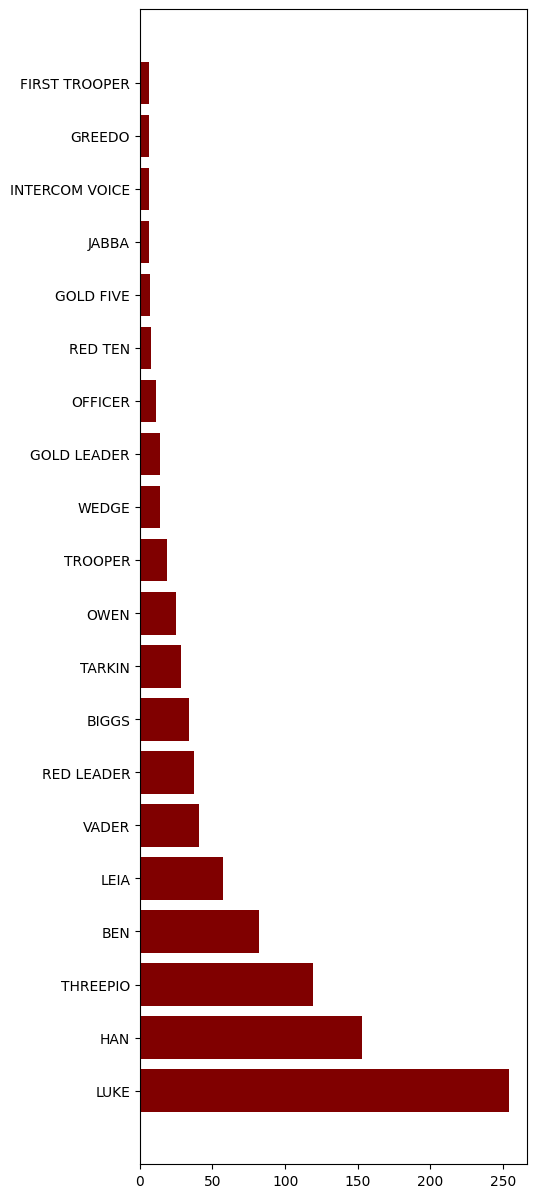

In [22]:
fig = plt.figure(figsize = (5, 15))
 
plt.barh([i[1] for i in pairs], [i[0] for i in pairs], color ='maroon')
plt.show

In [23]:
!python3 task1.py -r hadoop hdfs://namenode:8020/hw1/SW_EpisodeV.txt --output /hw1/results/task1/2

No configs found; falling back on auto-configuration
No configs specified for hadoop runner
Looking for hadoop binary in /opt/hadoop/bin...
Found hadoop binary: /opt/hadoop/bin/hadoop
Using Hadoop version 3.3.6
Looking for Hadoop streaming jar in /opt/hadoop...
Found Hadoop streaming jar: /opt/hadoop/share/hadoop/tools/lib/hadoop-streaming-3.3.6.jar
Creating temp directory /tmp/task1.root.20231128.003210.301346
uploading working dir files to hdfs:///user/root/tmp/mrjob/task1.root.20231128.003210.301346/files/wd...
Copying other local files to hdfs:///user/root/tmp/mrjob/task1.root.20231128.003210.301346/files/
Running step 1 of 2...
  packageJobJar: [/tmp/hadoop-unjar2515393980696021630/] [] /tmp/streamjob1904315815440188341.jar tmpDir=null
  Connecting to ResourceManager at resourcemanager/172.20.0.4:8032
  Connecting to ResourceManager at resourcemanager/172.20.0.4:8032
  Disabling Erasure Coding for path: /tmp/hadoop-yarn/staging/root/.staging/job_1701129529886_0003
  Total input fi

<function matplotlib.pyplot.show(close=None, block=None)>

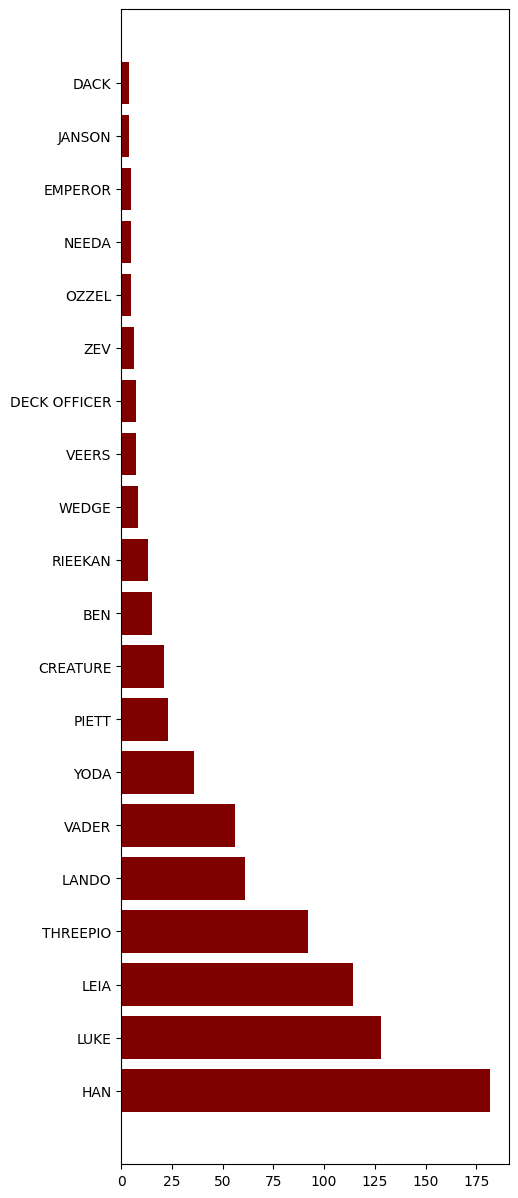

In [24]:
with hdfs.open_input_stream("/hw1/results/task1/2/part-00000") as file:
    data = file.readall().decode("utf-8")
pairs = json.loads(data[5:-1])
fig = plt.figure(figsize = (5, 15))
 
plt.barh([i[1] for i in pairs], [i[0] for i in pairs], color ='maroon')
plt.show

In [25]:
!python3 task1.py -r hadoop hdfs://namenode:8020/hw1/SW_EpisodeVI.txt --output /hw1/results/task1/3

No configs found; falling back on auto-configuration
No configs specified for hadoop runner
Looking for hadoop binary in /opt/hadoop/bin...
Found hadoop binary: /opt/hadoop/bin/hadoop
Using Hadoop version 3.3.6
Looking for Hadoop streaming jar in /opt/hadoop...
Found Hadoop streaming jar: /opt/hadoop/share/hadoop/tools/lib/hadoop-streaming-3.3.6.jar
Creating temp directory /tmp/task1.root.20231128.003247.652225
uploading working dir files to hdfs:///user/root/tmp/mrjob/task1.root.20231128.003247.652225/files/wd...
Copying other local files to hdfs:///user/root/tmp/mrjob/task1.root.20231128.003247.652225/files/
Running step 1 of 2...
  packageJobJar: [/tmp/hadoop-unjar5854427865977277024/] [] /tmp/streamjob537146224828693461.jar tmpDir=null
  Connecting to ResourceManager at resourcemanager/172.20.0.4:8032
  Connecting to ResourceManager at resourcemanager/172.20.0.4:8032
  Disabling Erasure Coding for path: /tmp/hadoop-yarn/staging/root/.staging/job_1701129529886_0005
  Total input fil

<function matplotlib.pyplot.show(close=None, block=None)>

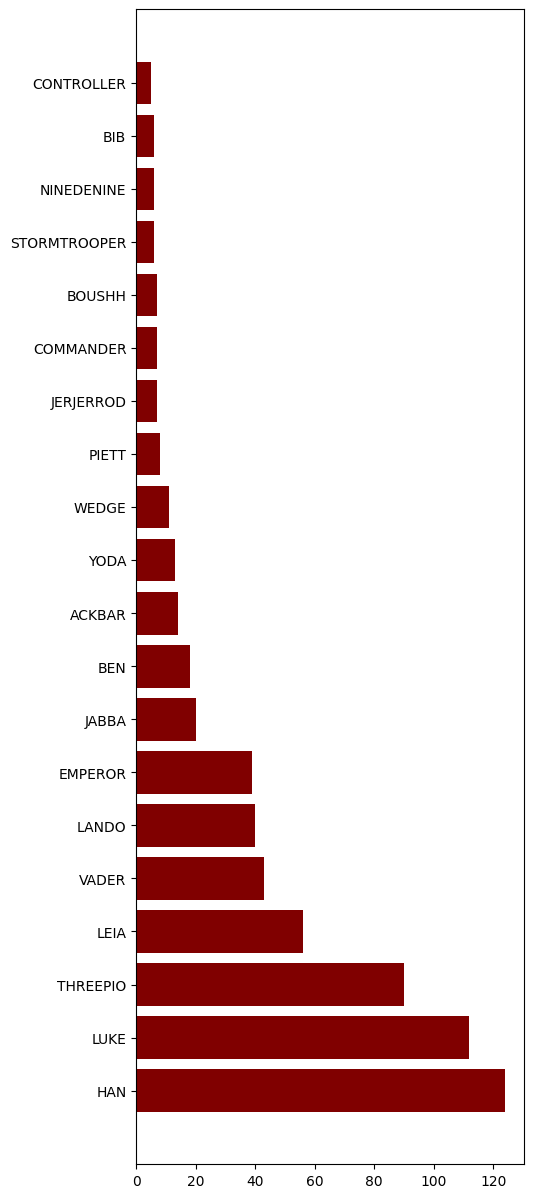

In [26]:
with hdfs.open_input_stream("/hw1/results/task1/3/part-00000") as file:
    data = file.readall().decode("utf-8")
pairs = json.loads(data[5:-1])
fig = plt.figure(figsize = (5, 15))
 
plt.barh([i[1] for i in pairs], [i[0] for i in pairs], color ='maroon')
plt.show

In [27]:
!python3 task1.py -r hadoop hdfs://namenode:8020/hw1/SW_EpisodeIV.txt hdfs://namenode:8020/hw1/SW_EpisodeV.txt hdfs://namenode:8020/hw1/SW_EpisodeVI.txt --output /hw1/results/task1/4

No configs found; falling back on auto-configuration
No configs specified for hadoop runner
Looking for hadoop binary in /opt/hadoop/bin...
Found hadoop binary: /opt/hadoop/bin/hadoop
Using Hadoop version 3.3.6
Looking for Hadoop streaming jar in /opt/hadoop...
Found Hadoop streaming jar: /opt/hadoop/share/hadoop/tools/lib/hadoop-streaming-3.3.6.jar
Creating temp directory /tmp/task1.root.20231128.003322.956372
uploading working dir files to hdfs:///user/root/tmp/mrjob/task1.root.20231128.003322.956372/files/wd...
Copying other local files to hdfs:///user/root/tmp/mrjob/task1.root.20231128.003322.956372/files/
Running step 1 of 2...
  packageJobJar: [/tmp/hadoop-unjar3151274393867432880/] [] /tmp/streamjob8697098158939862383.jar tmpDir=null
  Connecting to ResourceManager at resourcemanager/172.20.0.4:8032
  Connecting to ResourceManager at resourcemanager/172.20.0.4:8032
  Disabling Erasure Coding for path: /tmp/hadoop-yarn/staging/root/.staging/job_1701129529886_0007
  Total input fi

<function matplotlib.pyplot.show(close=None, block=None)>

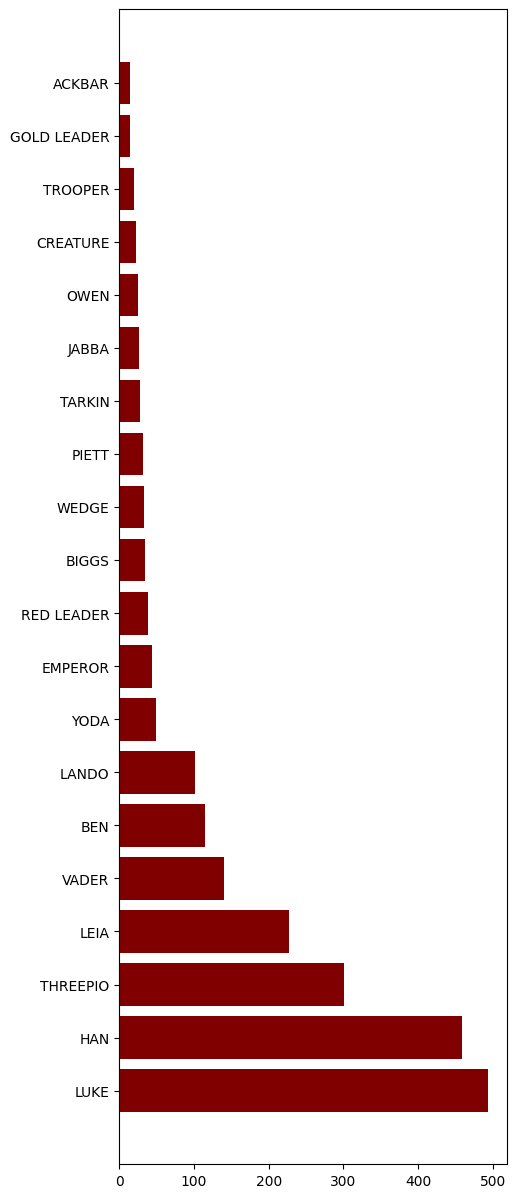

In [28]:
with hdfs.open_input_stream("/hw1/results/task1/4/part-00000") as file:
    data = file.readall().decode("utf-8")
pairs = json.loads(data[5:-1])
fig = plt.figure(figsize = (5, 15))
 
plt.barh([i[1] for i in pairs], [i[0] for i in pairs], color ='maroon')
plt.show

In [29]:
%%file task2.py
# %%file is an Ipython magic function that saves the code cell as a file

from mrjob.job import MRJob
from mrjob.step import MRStep

class MRTask2(MRJob):


    def mapper(self, _, line):
        spl = line.split('" "')
        name = spl[1].strip('"\n ')
        if name != 'dialogue':
            phrase = spl[2].strip('"\n ')  
            yield (name, phrase)

    def combiner(self, name, phrases):
        p = max(phrases, key=lambda x: len(x))
        yield (name, p)

    def reducer_max_len(self, name, phrases):
        p = max(phrases, key=lambda x: len(x))
        yield None, (name, p)

    def reducer_sort_phrases(self, _, phrases_pairs):
        # each item of word_count_pairs is (count, word),
        # so yielding one results in key=counts, value=word
        sorted_pairs = sorted(phrases_pairs, key=lambda x: len(x[1]), reverse=True)
        yield None, sorted_pairs
    
    def steps(self):
        return [
            MRStep(mapper=self.mapper,
                   combiner=self.combiner,
                   reducer=self.reducer_max_len),
            MRStep(reducer=self.reducer_sort_phrases)
        ]

if __name__ == '__main__':
    MRTask2.run()

Overwriting task2.py


In [30]:
!python3 task2.py SW_EpisodeIV.txt

No configs found; falling back on auto-configuration
No configs specified for inline runner
Creating temp directory /tmp/task2.root.20231128.003400.970176
Running step 1 of 2...
Running step 2 of 2...
job output is in /tmp/task2.root.20231128.003400.970176/output
Streaming final output from /tmp/task2.root.20231128.003400.970176/output...
null	[["LEIA", "General Kenobi, years ago you served my father in the Clone Wars.  Now he begs you to help him in his struggle against the Empire.  I regret that I am unable to present my father's request to you in person, but my ship has fallen under attack and I'm afraid my mission to bring you to Alderaan has failed.  I have placed information vital to the survival of the Rebellion into the memory systems of this R2 unit.  My father will know how to retrieve it.  You must see this droid safely delivered to him on Alderaan.  This is our most desperate hour.  Help me, Obi-Wan Kenobi, you're my only hope."], ["BIGGS", "I feel for you, Luke, you're goi

In [31]:
!hadoop fs -mkdir /hw1/results/task2

In [32]:
!python3 task2.py -r hadoop hdfs://namenode:8020/hw1/SW_EpisodeIV.txt --output /hw1/results/task2/1

No configs found; falling back on auto-configuration
No configs specified for hadoop runner
Looking for hadoop binary in /opt/hadoop/bin...
Found hadoop binary: /opt/hadoop/bin/hadoop
Using Hadoop version 3.3.6
Looking for Hadoop streaming jar in /opt/hadoop...
Found Hadoop streaming jar: /opt/hadoop/share/hadoop/tools/lib/hadoop-streaming-3.3.6.jar
Creating temp directory /tmp/task2.root.20231128.003402.257621
uploading working dir files to hdfs:///user/root/tmp/mrjob/task2.root.20231128.003402.257621/files/wd...
Copying other local files to hdfs:///user/root/tmp/mrjob/task2.root.20231128.003402.257621/files/
Running step 1 of 2...
  packageJobJar: [/tmp/hadoop-unjar3576635344528657278/] [] /tmp/streamjob3173731544627440163.jar tmpDir=null
  Connecting to ResourceManager at resourcemanager/172.20.0.4:8032
  Connecting to ResourceManager at resourcemanager/172.20.0.4:8032
  Disabling Erasure Coding for path: /tmp/hadoop-yarn/staging/root/.staging/job_1701129529886_0009
  Total input fi

In [33]:
with hdfs.open_input_stream("/hw1/results/task2/1/part-00000") as file:
    data = file.readall().decode("utf-8")
pairs = json.loads(data[5:-1])
for name, ph in pairs:
    print(f'{name}: {ph}')

LEIA: General Kenobi, years ago you served my father in the Clone Wars.  Now he begs you to help him in his struggle against the Empire.  I regret that I am unable to present my father's request to you in person, but my ship has fallen under attack and I'm afraid my mission to bring you to Alderaan has failed.  I have placed information vital to the survival of the Rebellion into the memory systems of this R2 unit.  My father will know how to retrieve it.  You must see this droid safely delivered to him on Alderaan.  This is our most desperate hour.  Help me, Obi-Wan Kenobi, you're my only hope.
BIGGS: I feel for you, Luke, you're going to have to learn what seems to be important or what really is important.  What good is all your uncle's work if it's taken over by the Empire?...  You know they're starting to nationalize commerce in the central systems...it won't be long before your uncle is merely a tenant, slaving for the greater glory of the Empire.
DODONNA: The approach will not be

In [34]:
!python3 task2.py -r hadoop hdfs://namenode:8020/hw1/SW_EpisodeV.txt --output /hw1/results/task2/2

No configs found; falling back on auto-configuration
No configs specified for hadoop runner
Looking for hadoop binary in /opt/hadoop/bin...
Found hadoop binary: /opt/hadoop/bin/hadoop
Using Hadoop version 3.3.6
Looking for Hadoop streaming jar in /opt/hadoop...
Found Hadoop streaming jar: /opt/hadoop/share/hadoop/tools/lib/hadoop-streaming-3.3.6.jar
Creating temp directory /tmp/task2.root.20231128.003438.640928
uploading working dir files to hdfs:///user/root/tmp/mrjob/task2.root.20231128.003438.640928/files/wd...
Copying other local files to hdfs:///user/root/tmp/mrjob/task2.root.20231128.003438.640928/files/
Running step 1 of 2...
  packageJobJar: [/tmp/hadoop-unjar7164128673620778765/] [] /tmp/streamjob6293992661492576517.jar tmpDir=null
  Connecting to ResourceManager at resourcemanager/172.20.0.4:8032
  Connecting to ResourceManager at resourcemanager/172.20.0.4:8032
  Disabling Erasure Coding for path: /tmp/hadoop-yarn/staging/root/.staging/job_1701129529886_0011
  Total input fi

In [35]:
with hdfs.open_input_stream("/hw1/results/task2/2/part-00000") as file:
    data = file.readall().decode("utf-8")
pairs = json.loads(data[5:-1])
for name, ph in pairs:
    print(f'{name}: {ph}')

YODA: Ready, are you? What know you of ready? For eight hundred years  have I trained Jedi. My own counsel will I keep on who is to be trained! A Jedi must have the deepest commitment, the most serious mind.  This one a long time have I watched. Never his mind on where he was. Hmm? What he was doing. Hmph. Adventure. Heh! Excitement. Heh! A Jedi craves not these things.  You are reckless!
VADER: There is no escape. Don't make me destroy you. You do not yet  realize your importance. You have only begun to discover you power. Join me and I will complete your training. With our combined strength, we can end this destructive conflict and bring order to the galaxy.
LEIA: All troop carriers will assemble at the north entrance. The  heavy transport ships will leave as soon as they're loaded. Only two fighter escorts per ship. The energy shield can only be opened for a short time, so you'll have to stay very close to your transports.
THREEPIO: Don't try to blame me. I didn't ask you to turn on

In [36]:
!python3 task2.py -r hadoop hdfs://namenode:8020/hw1/SW_EpisodeVI.txt --output /hw1/results/task2/3

No configs found; falling back on auto-configuration
No configs specified for hadoop runner
Looking for hadoop binary in /opt/hadoop/bin...
Found hadoop binary: /opt/hadoop/bin/hadoop
Using Hadoop version 3.3.6
Looking for Hadoop streaming jar in /opt/hadoop...
Found Hadoop streaming jar: /opt/hadoop/share/hadoop/tools/lib/hadoop-streaming-3.3.6.jar
Creating temp directory /tmp/task2.root.20231128.003513.953009
uploading working dir files to hdfs:///user/root/tmp/mrjob/task2.root.20231128.003513.953009/files/wd...
Copying other local files to hdfs:///user/root/tmp/mrjob/task2.root.20231128.003513.953009/files/
Running step 1 of 2...
  packageJobJar: [/tmp/hadoop-unjar4627365767982885608/] [] /tmp/streamjob26610863669241067.jar tmpDir=null
  Connecting to ResourceManager at resourcemanager/172.20.0.4:8032
  Connecting to ResourceManager at resourcemanager/172.20.0.4:8032
  Disabling Erasure Coding for path: /tmp/hadoop-yarn/staging/root/.staging/job_1701129529886_0013
  Total input file

In [37]:
with hdfs.open_input_stream("/hw1/results/task2/3/part-00000") as file:
    data = file.readall().decode("utf-8")
pairs = json.loads(data[5:-1])
for name, ph in pairs:
    print(f'{name}: {ph}')

BEN: The Organa household was high-born and politically quite powerful in that system. Leia became a princess by virtue of lineage... no one knew she'd been adopted, of course. But it was a title without real power, since Alderaan had long been a democracy.  Even so, the family continued to be politically powerful, and Leia, following in her foster father's path, became a senator as well.  That's not all she became, of course... she became the leader of her cell in the Alliance against the corrupt Empire. And because she had diplomatic immunity, she was a vital link for getting information to the Rebel cause.  That's what she was doing when her path crossed yours... for her foster parents had always told her to contact me on Tatooine, if her troubles became desperate.
ACKBAR: You can see here the Death Star orbiting the forest Moon of Endor. Although the weapon systems on this Death Star are not yet operational, the Death Star does have a strong defense mechanism. It is protected by an

In [38]:
!python3 task2.py -r hadoop hdfs://namenode:8020/hw1/SW_EpisodeIV.txt hdfs://namenode:8020/hw1/SW_EpisodeV.txt hdfs://namenode:8020/hw1/SW_EpisodeVI.txt --output /hw1/results/task2/4

No configs found; falling back on auto-configuration
No configs specified for hadoop runner
Looking for hadoop binary in /opt/hadoop/bin...
Found hadoop binary: /opt/hadoop/bin/hadoop
Using Hadoop version 3.3.6
Looking for Hadoop streaming jar in /opt/hadoop...
Found Hadoop streaming jar: /opt/hadoop/share/hadoop/tools/lib/hadoop-streaming-3.3.6.jar
Creating temp directory /tmp/task2.root.20231128.003550.229965
uploading working dir files to hdfs:///user/root/tmp/mrjob/task2.root.20231128.003550.229965/files/wd...
Copying other local files to hdfs:///user/root/tmp/mrjob/task2.root.20231128.003550.229965/files/
Running step 1 of 2...
  packageJobJar: [/tmp/hadoop-unjar8107299859035544382/] [] /tmp/streamjob946890217925475543.jar tmpDir=null
  Connecting to ResourceManager at resourcemanager/172.20.0.4:8032
  Connecting to ResourceManager at resourcemanager/172.20.0.4:8032
  Disabling Erasure Coding for path: /tmp/hadoop-yarn/staging/root/.staging/job_1701129529886_0015
  Total input fil

In [39]:
with hdfs.open_input_stream("/hw1/results/task2/4/part-00000") as file:
    data = file.readall().decode("utf-8")
pairs = json.loads(data[5:-1])
for name, ph in pairs:
    print(f'{name}: {ph}')

BEN: The Organa household was high-born and politically quite powerful in that system. Leia became a princess by virtue of lineage... no one knew she'd been adopted, of course. But it was a title without real power, since Alderaan had long been a democracy.  Even so, the family continued to be politically powerful, and Leia, following in her foster father's path, became a senator as well.  That's not all she became, of course... she became the leader of her cell in the Alliance against the corrupt Empire. And because she had diplomatic immunity, she was a vital link for getting information to the Rebel cause.  That's what she was doing when her path crossed yours... for her foster parents had always told her to contact me on Tatooine, if her troubles became desperate.
LEIA: General Kenobi, years ago you served my father in the Clone Wars.  Now he begs you to help him in his struggle against the Empire.  I regret that I am unable to present my father's request to you in person, but my s

In [40]:
%%file task3.py
# %%file is an Ipython magic function that saves the code cell as a file

from mrjob.job import MRJob
from mrjob.step import MRStep

class MRTask3(MRJob):

    def mapper_init(self):
        import nltk
        nltk.download('punkt', quiet=True)
        nltk.download('stopwords', quiet=True)
        
    def mapper(self, _, line):
        from nltk.corpus import stopwords
        from nltk.tokenize import word_tokenize
        from nltk.util import bigrams
        spl = line.split('" "')
        name = spl[1].strip('"\n ')
        if name != 'dialogue':
            phrase = spl[2].strip('"\n ').lower()
            tokens = word_tokenize(phrase)
            tokens = [word for word in tokens if not word in stopwords.words('english') and word.isalnum()]
            tokens = list(bigrams(tokens))
            counter = {}
            for token in tokens:
                if token not in counter:
                    counter[token] = 1
                else:
                    counter[token] += 1
            for token in counter:
                yield (token, counter[token])

    def combiner(self, token, counts):
        
        yield (token, sum(counts))

    def reducer_token_counts(self, token, counts):
        
        yield None, (token, sum(counts))

    def reducer_sort_counts(self, _, token_pairs):
        # each item of word_count_pairs is (count, word),
        # so yielding one results in key=counts, value=word
        sorted_pairs = sorted(token_pairs, key=lambda x: x[1], reverse=True)[:20]
        yield None, sorted_pairs
    
    def steps(self):
        return [
            MRStep(mapper_init=self.mapper_init,
                    mapper=self.mapper,
                   combiner=self.combiner,
                   reducer=self.reducer_token_counts),
            MRStep(reducer=self.reducer_sort_counts)
        ]

if __name__ == '__main__':
    MRTask3.run()

Overwriting task3.py


In [42]:
!pip install nltk

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.5/1.5 MB 4.7 MB/s eta 0:00:00a 0:00:010m
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 302.2/302.2 KB 9.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 97.9/97.9 KB 7.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 78.3/78.3 KB 6.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 773.9/773.9 KB 6.1 MB/s eta 0:00:00a 0:00:01


In [43]:
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
nltk.download('punkt')
nltk.download('stopwords')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [44]:
!python3 task3.py SW_EpisodeIV.txt

No configs found; falling back on auto-configuration
No configs specified for inline runner
Creating temp directory /tmp/task3.root.20231128.003817.156523
Running step 1 of 2...
Running step 2 of 2...
job output is in /tmp/task3.root.20231128.003817.156523/output
Streaming final output from /tmp/task3.root.20231128.003817.156523/output...
null	[[["r2", "unit"], 11], [["rebel", "base"], 11], [["battle", "station"], 10], [["sand", "people"], 10], [["luke", "luke"], 9], [["looks", "like"], 9], [["let", "go"], 8], [["lord", "vader"], 7], [["uncle", "owen"], 7], [["old", "man"], 6], [["red", "leader"], 6], [["come", "back"], 6], [["know", "talking"], 5], [["ben", "kenobi"], 5], [["red", "five"], 5], [["death", "star"], 5], [["tractor", "beam"], 5], [["help", "kenobi"], 5], [["yes", "sir"], 5], [["new", "droids"], 4]]
Removing temp directory /tmp/task3.root.20231128.003817.156523...


In [45]:
!hadoop fs -mkdir /hw1/results/task3

In [46]:
!python3 task3.py -r hadoop hdfs://namenode:8020/hw1/SW_EpisodeIV.txt --output /hw1/results/task3/1

No configs found; falling back on auto-configuration
No configs specified for hadoop runner
Looking for hadoop binary in /opt/hadoop/bin...
Found hadoop binary: /opt/hadoop/bin/hadoop
Using Hadoop version 3.3.6
Looking for Hadoop streaming jar in /opt/hadoop...
Found Hadoop streaming jar: /opt/hadoop/share/hadoop/tools/lib/hadoop-streaming-3.3.6.jar
Creating temp directory /tmp/task3.root.20231128.003824.327196
uploading working dir files to hdfs:///user/root/tmp/mrjob/task3.root.20231128.003824.327196/files/wd...
Copying other local files to hdfs:///user/root/tmp/mrjob/task3.root.20231128.003824.327196/files/
Running step 1 of 2...
  packageJobJar: [/tmp/hadoop-unjar526759008777008435/] [] /tmp/streamjob3391522852780426663.jar tmpDir=null
  Connecting to ResourceManager at resourcemanager/172.20.0.4:8032
  Connecting to ResourceManager at resourcemanager/172.20.0.4:8032
  Disabling Erasure Coding for path: /tmp/hadoop-yarn/staging/root/.staging/job_1701129529886_0017
  Total input fil

<function matplotlib.pyplot.show(close=None, block=None)>

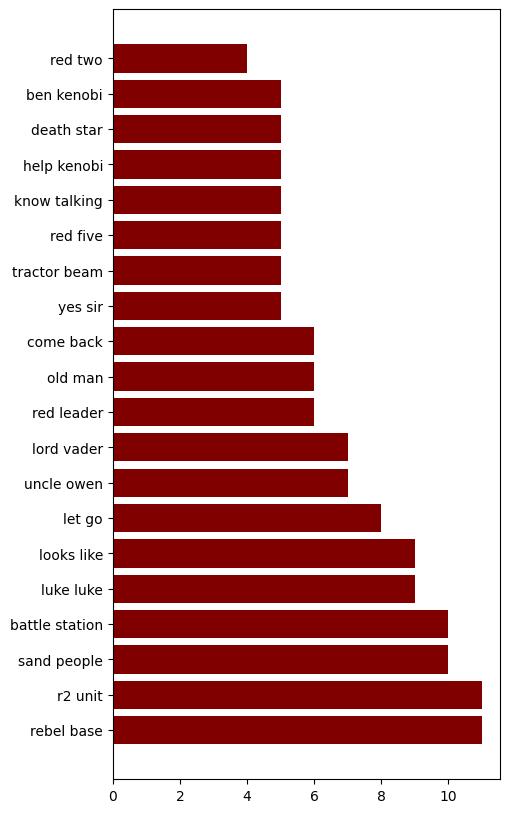

In [47]:
with hdfs.open_input_stream("/hw1/results/task3/1/part-00000") as file:
    data = file.readall().decode("utf-8")
pairs = json.loads(data[5:-1])
fig = plt.figure(figsize = (5, 10))
 
plt.barh([" ".join(i[0]) for i in pairs], [i[1] for i in pairs], color ='maroon')
plt.show

In [48]:
!python3 task3.py -r hadoop hdfs://namenode:8020/hw1/SW_EpisodeV.txt --output /hw1/results/task3/2

No configs found; falling back on auto-configuration
No configs specified for hadoop runner
Looking for hadoop binary in /opt/hadoop/bin...
Found hadoop binary: /opt/hadoop/bin/hadoop
Using Hadoop version 3.3.6
Looking for Hadoop streaming jar in /opt/hadoop...
Found Hadoop streaming jar: /opt/hadoop/share/hadoop/tools/lib/hadoop-streaming-3.3.6.jar
Creating temp directory /tmp/task3.root.20231128.003911.630057
uploading working dir files to hdfs:///user/root/tmp/mrjob/task3.root.20231128.003911.630057/files/wd...
Copying other local files to hdfs:///user/root/tmp/mrjob/task3.root.20231128.003911.630057/files/
Running step 1 of 2...
  packageJobJar: [/tmp/hadoop-unjar8224591634610558711/] [] /tmp/streamjob8353628582678189886.jar tmpDir=null
  Connecting to ResourceManager at resourcemanager/172.20.0.4:8032
  Connecting to ResourceManager at resourcemanager/172.20.0.4:8032
  Disabling Erasure Coding for path: /tmp/hadoop-yarn/staging/root/.staging/job_1701129529886_0019
  Total input fi

<function matplotlib.pyplot.show(close=None, block=None)>

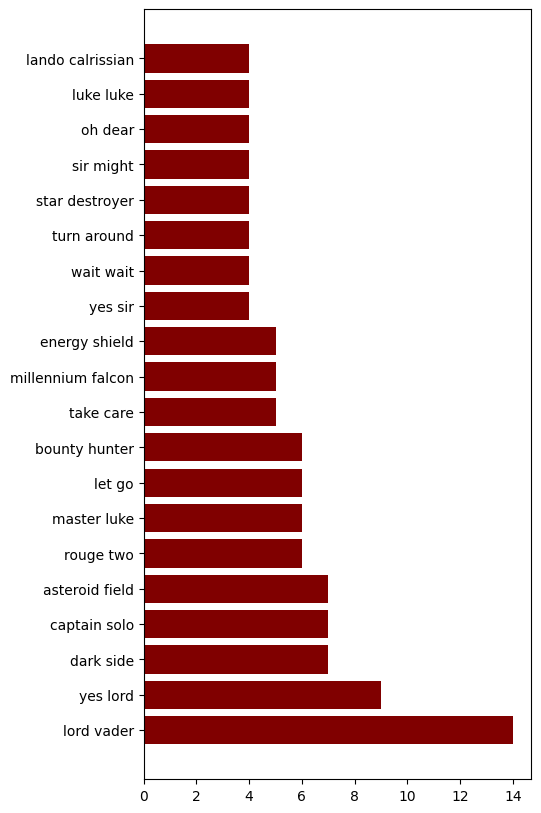

In [49]:
with hdfs.open_input_stream("/hw1/results/task3/2/part-00000") as file:
    data = file.readall().decode("utf-8")
pairs = json.loads(data[5:-1])
fig = plt.figure(figsize = (5, 10))
 
plt.barh([" ".join(i[0]) for i in pairs], [i[1] for i in pairs], color ='maroon')
plt.show

In [50]:
!python3 task3.py -r hadoop hdfs://namenode:8020/hw1/SW_EpisodeVI.txt --output /hw1/results/task3/3

No configs found; falling back on auto-configuration
No configs specified for hadoop runner
Looking for hadoop binary in /opt/hadoop/bin...
Found hadoop binary: /opt/hadoop/bin/hadoop
Using Hadoop version 3.3.6
Looking for Hadoop streaming jar in /opt/hadoop...
Found Hadoop streaming jar: /opt/hadoop/share/hadoop/tools/lib/hadoop-streaming-3.3.6.jar
Creating temp directory /tmp/task3.root.20231128.003947.889455
uploading working dir files to hdfs:///user/root/tmp/mrjob/task3.root.20231128.003947.889455/files/wd...
Copying other local files to hdfs:///user/root/tmp/mrjob/task3.root.20231128.003947.889455/files/
Running step 1 of 2...
  packageJobJar: [/tmp/hadoop-unjar1575243412974379827/] [] /tmp/streamjob1966276864349599825.jar tmpDir=null
  Connecting to ResourceManager at resourcemanager/172.20.0.4:8032
  Connecting to ResourceManager at resourcemanager/172.20.0.4:8032
  Disabling Erasure Coding for path: /tmp/hadoop-yarn/staging/root/.staging/job_1701129529886_0021
  Total input fi

<function matplotlib.pyplot.show(close=None, block=None)>

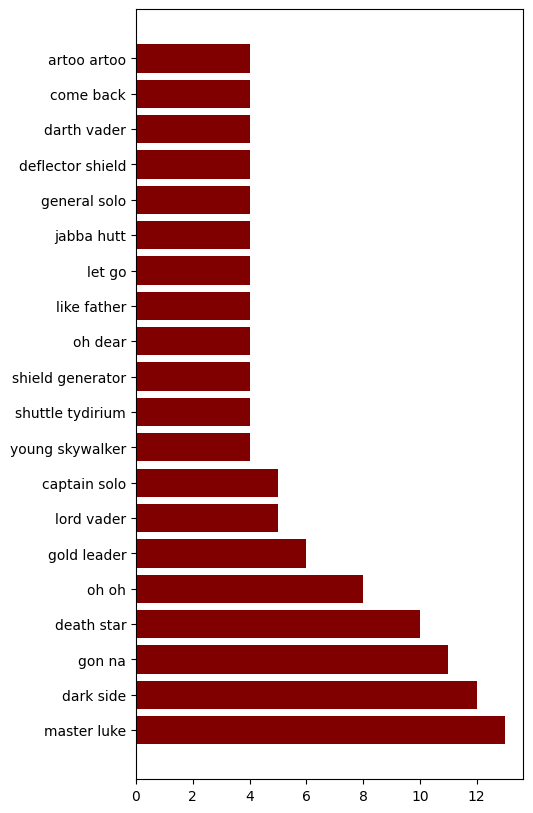

In [51]:
with hdfs.open_input_stream("/hw1/results/task3/3/part-00000") as file:
    data = file.readall().decode("utf-8")
pairs = json.loads(data[5:-1])
fig = plt.figure(figsize = (5, 10))

plt.barh([" ".join(i[0]) for i in pairs], [i[1] for i in pairs], color ='maroon')
plt.show

In [52]:
!python3 task3.py -r hadoop hdfs://namenode:8020/hw1/SW_EpisodeIV.txt hdfs://namenode:8020/hw1/SW_EpisodeV.txt hdfs://namenode:8020/hw1/SW_EpisodeVI.txt --output /hw1/results/task3/4

No configs found; falling back on auto-configuration
No configs specified for hadoop runner
Looking for hadoop binary in /opt/hadoop/bin...
Found hadoop binary: /opt/hadoop/bin/hadoop
Using Hadoop version 3.3.6
Looking for Hadoop streaming jar in /opt/hadoop...
Found Hadoop streaming jar: /opt/hadoop/share/hadoop/tools/lib/hadoop-streaming-3.3.6.jar
Creating temp directory /tmp/task3.root.20231128.004023.181315
uploading working dir files to hdfs:///user/root/tmp/mrjob/task3.root.20231128.004023.181315/files/wd...
Copying other local files to hdfs:///user/root/tmp/mrjob/task3.root.20231128.004023.181315/files/
Running step 1 of 2...
  packageJobJar: [/tmp/hadoop-unjar1017472012396207972/] [] /tmp/streamjob1822434250477360754.jar tmpDir=null
  Connecting to ResourceManager at resourcemanager/172.20.0.4:8032
  Connecting to ResourceManager at resourcemanager/172.20.0.4:8032
  Disabling Erasure Coding for path: /tmp/hadoop-yarn/staging/root/.staging/job_1701129529886_0023
  Total input fi

<function matplotlib.pyplot.show(close=None, block=None)>

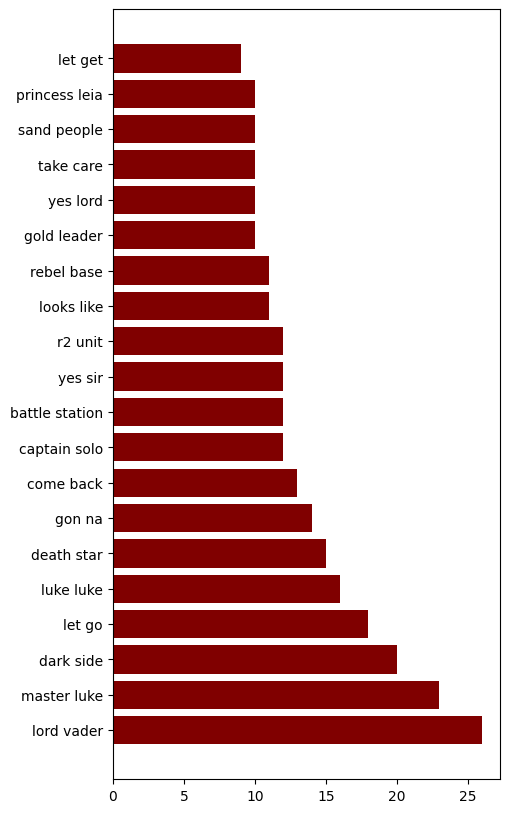

In [53]:
with hdfs.open_input_stream("/hw1/results/task3/4/part-00000") as file:
    data = file.readall().decode("utf-8")
pairs = json.loads(data[5:-1])
fig = plt.figure(figsize = (5, 10))
 
plt.barh([" ".join(i[0]) for i in pairs], [i[1] for i in pairs], color ='maroon')
plt.show